In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings("ignore") 

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [4]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [5]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Univariate Exploration

Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

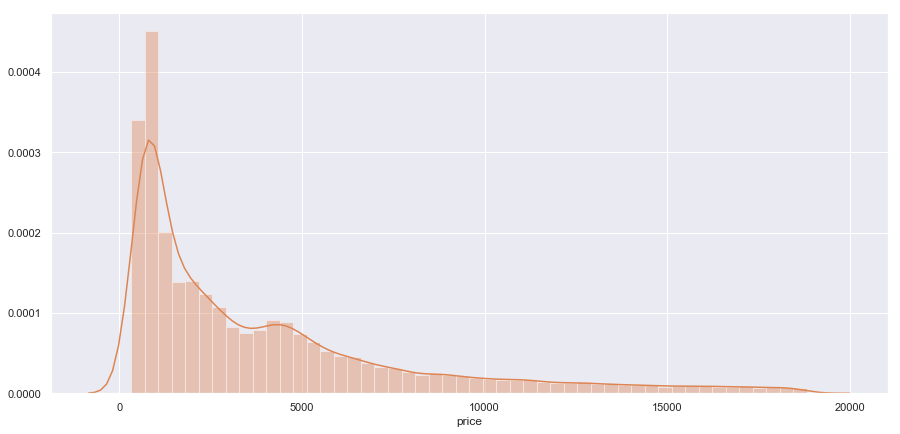

In [6]:
# univariate plot of diamond prices
# with seaborn
plt.subplots(figsize=(15,7))
base_color = sns.color_palette()[1]
sns.distplot(diamonds['price'],color=base_color);

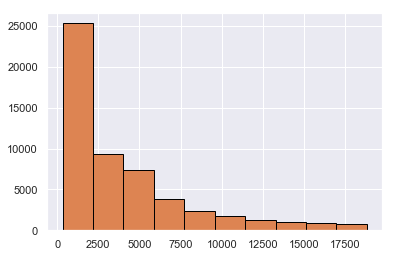

In [7]:
# univariate plot of diamond prices
# with matplotlib
plt.hist(data=diamonds,x='price',color=base_color,edgecolor='black');

**Price distribution comment 1:** You should create a histogram for price, since it is a numeric variable. Your initial plots should show that diamond price follows a highly skewed distribution.

**Price distribution comment 2:** Under a log scale, you should see that the data is roughly bimodal, with one large peak somewhere between 500 and 1000, and a second large peak between 4 and 5 thousand. The price distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.

Next, create a plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?

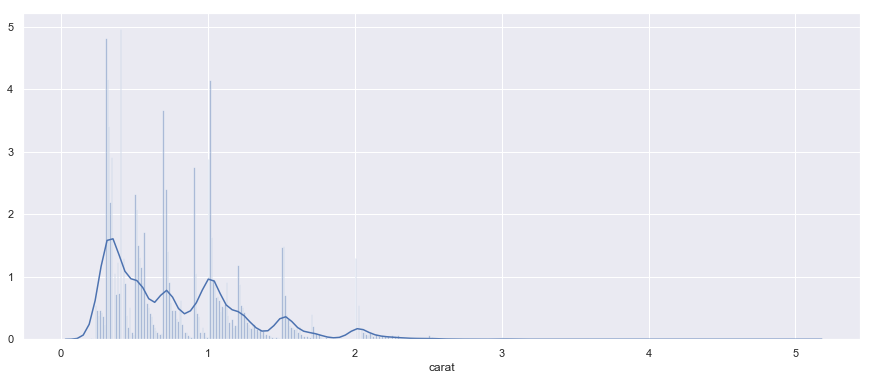

In [8]:
# univariate plot of diamond prices
# with matplotlib
plt.subplots(figsize=(15,6))
bins = np.arange(0,5.01+0.01,0.01)
base_color = sns.color_palette()[0]
sns.distplot(diamonds['carat'],color=base_color,bins=bins);

That would be better to see the fuction with logarithm scale

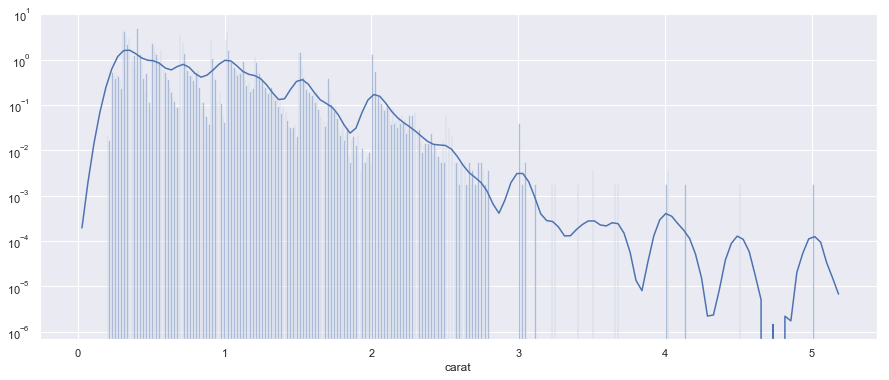

In [9]:
# univariate plot of diamond prices
f,ax= plt.subplots(figsize=(15,6))
bins = np.arange(0,5.01+0.01,0.01)
base_color = sns.color_palette()[0]
sns.distplot(diamonds['carat'],color=base_color,bins=bins);
ax.set_yscale('log')

**Carat distribution comment:** You should see an interesting pattern in carat weights, where there is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike. In this case, it's a good idea to set the bin size small (e.g. 0.01) and zoom into a narrower range of values to clearly see the spikes in the data values. Perhaps these spikes come about as part of standard diamond size conventions?

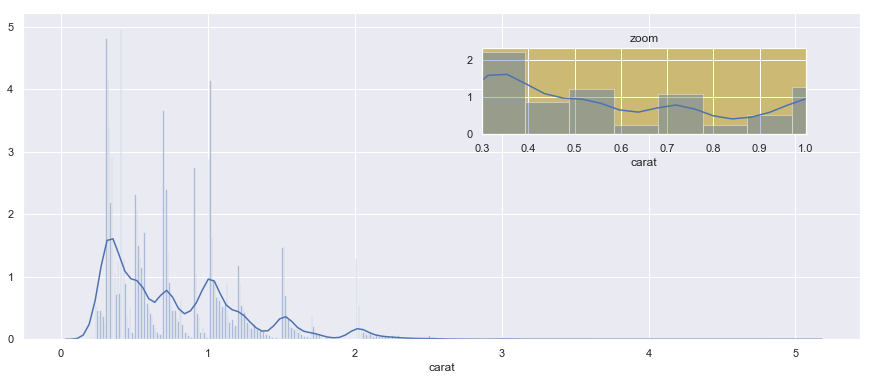

In [10]:
#Addition : you can zoom in specific area of fuction  
f,ax= plt.subplots(figsize=(15,6))
bins = np.arange(0,5.01+0.01,0.01)
base_color = sns.color_palette()[0]
sns.distplot(diamonds['carat'],color=base_color,bins=bins, ax=ax)
ax2 = plt.axes([0.55, 0.6, .3, .2], facecolor='y')
# this plotting shows the size and position of zoomed picture. 
sns.distplot(diamonds['carat'], ax=ax2)
ax2.set_title('zoom')
ax2.set_xlim([0.3,1.]);
# limitation of zoom in interval 

Now, let's move on to exploring the other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?

General categorical feature comment: Since these features are categorical, you should be producing **bar charts** here. In addition, since they're ordinal in nature, the bars should be sorted in order of increasing quality level. Check the previous page if you need documentation on how the scales are set up, since they're not completely intuitive

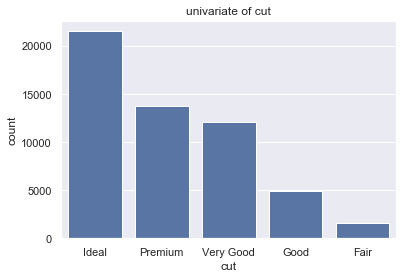

In [11]:
# univariate plots of color
base_color = sns.color_palette()[0]
sns.countplot(data=diamonds,x='cut',color=base_color,order=diamonds['cut'].value_counts().index);
plt.title("univariate of cut");

Cut distribution comment: The bar chart should show that the mode cut quality for diamonds in this dataset is the highest grade, Ideal. There is a consistent decrease in number of diamonds of lower cut grades.

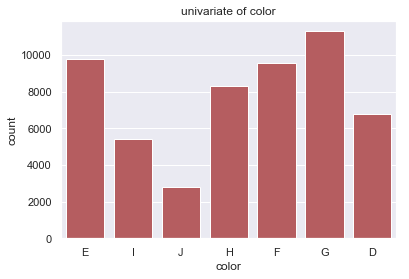

In [12]:
# univariate plots of color, and clarity grades
base_color = sns.color_palette()[3]
sns.countplot(data=diamonds,x='color',color=base_color);
plt.title("univariate of color");

Color distribution comment: The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G. (There are other diamond grades that are worse than J, but they're not part of the collected data.)

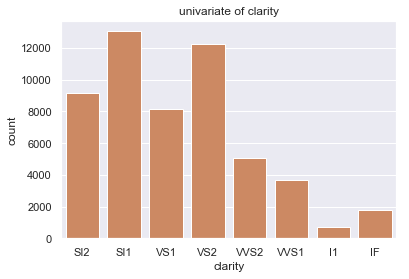

In [13]:
# univariate plots of clarity grades
base_color = sns.color_palette()[1]
sns.countplot(data=diamonds,x='clarity',color=base_color);
plt.title("univariate of clarity");

Clarity distribution comment: There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). 

more in detail about diamond clariy grades : https://www.brilliantearth.com/diamond-clarity/

## Bivariate Exploration

In the previous notebook, you looked at the univariate distribution of five features in the diamonds dataset: price, carat, cut, color, and clarity. Now, we'll investigate relationships between pairs of these variables, particularly how each of them relate to diamond price.

To start, construct a plot of the price against carat weight. What kind of shape does the relationship between these variables take?

In [14]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

In [15]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


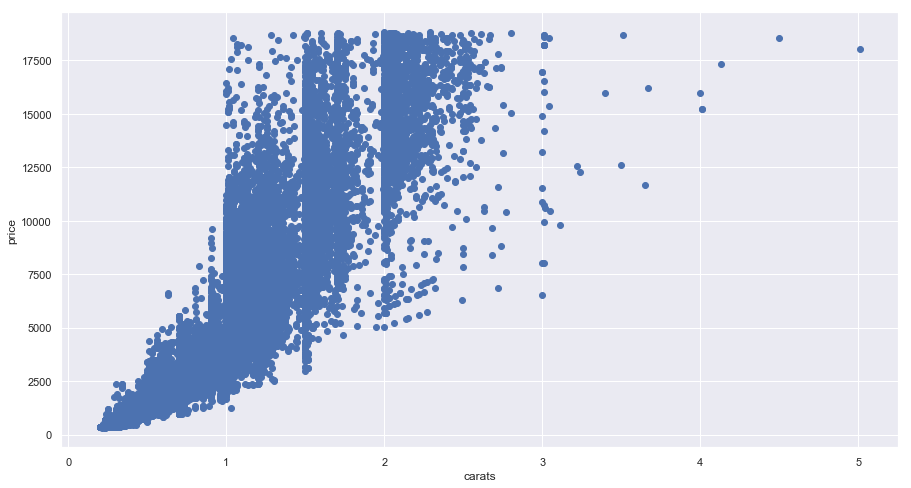

In [16]:
# bivariate plot of price vs. carat
plt.subplots(figsize=(15,8))
plt.scatter(x=diamonds['carat'],y=diamonds['price'])
plt.xlabel('carats')
plt.ylabel('price');

In [17]:
diamonds.describe()
# decision criteria for bins 

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


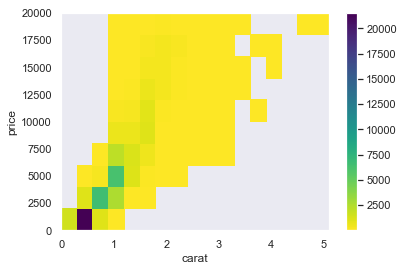

In [18]:
bin_carat = np.arange(0,5.01+0.3,0.3)
bin_price = np.arange(0,18823+2000,2000)
plt.hist2d(data=diamonds,x='carat',y='price',cmin=0.5,cmap='viridis_r',bins=[bin_carat,bin_price]) ;
plt.colorbar()  
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

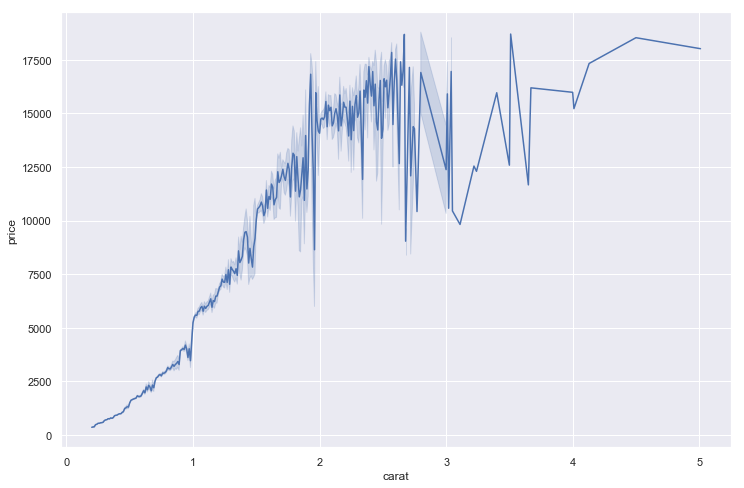

In [19]:
# bivariate plot of price vs. carat
plt.subplots(figsize=(12,8))
sns.lineplot(data=diamonds,x='carat',y='price',ci=90)
plt.xlabel('carat')
plt.ylabel('price');

Price vs. Carat comment 1: Since these are both numeric variables, a scatterplot is a natural choice. You might also consider a heat map for this task.

Price vs. Carat comment 2: Assuming that you put price on the y-axis and carat on the x-axis, the transformation should have changed the scatterplot from looking concave upwards (like an upwards-pointing bowl) to concave downards (like a downwards-pointing bowl). It would be nice to have a linear trend

Price vs. Carat comment 3: One thing that you might notice in the visualization after transformation is that the trend between price and carat weight is 'cut off' by the maximum price limit of diamonds available in the dataset. For diamonds above about 1.5 carats, we'd probably expect some diamonds about $20,000 in price, given the trend below 1.5 carats. This would be a point to potentially pay attention to later on with interaction effects between other factors, and when building a model of diamond prices.</span>

Now let's take a look at the relationship between price and the three categorical quality features, cut, color, and clarity. Are there any surprising trends to be seen here?

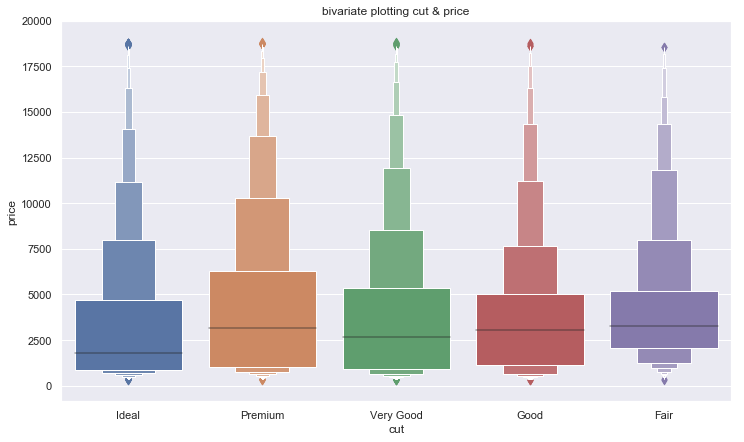

In [20]:
# bivariate plots of price vs. cut, color, clarity
plt.subplots(figsize=(12,7))
sns.boxenplot(data=diamonds,x='cut',y='price',order=diamonds['cut'].value_counts().index,scale='exponential');
plt.title('bivariate plotting cut & price');

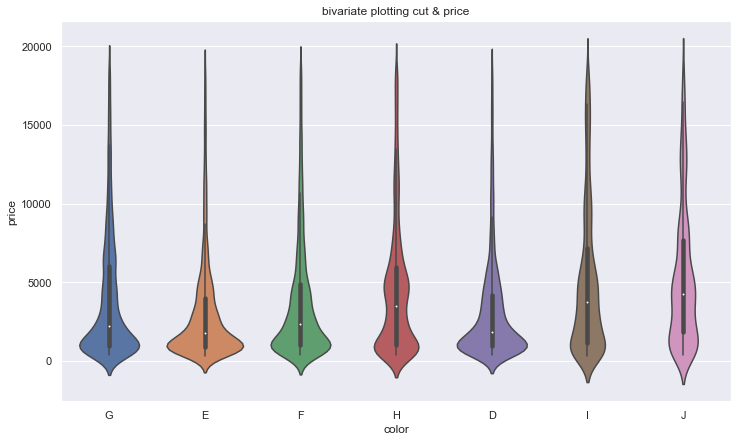

In [21]:
# bivariate plots of price vs color
plt.subplots(figsize=(12,7))
sns.violinplot(data=diamonds,x='color',y='price',order=diamonds['color'].value_counts().index);
plt.title('bivariate plotting cut & price');

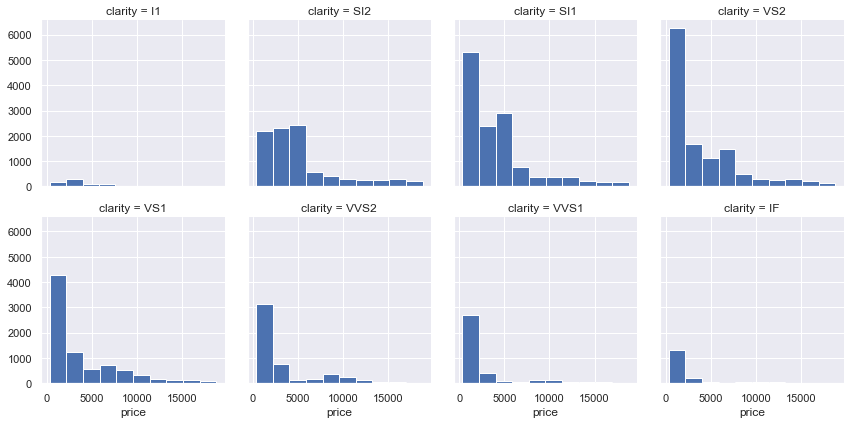

In [22]:
# bivariate plots of price vs clarity
g=sns.FacetGrid(data=diamonds,col='clarity',col_wrap=4)
g.map(plt.hist,'price');

Price vs. Categorical comment 1: There's a lot of different approaches you could have taken here. If you created a box plot, then you probably noticed something interesting and unintuitive: the median price of diamonds should tend to look like it _decrease_ with _increasing_ gem quality

Price vs. Categorical comment 2: With a violin plot, you can get more insight into what causes the trend in median prices to appear as it does. Faceted histograms will also produce a similar result

Before we complete the bivariate exploration, we should take a look at some of the relationships between the independent variables. Namely, how does carat weight change across the other three 'C' quality measures? You can take the same approach as the above investigation of price against the three categorical quality measures. What can you see in these plots, and how does this relate to your earlier investigations?

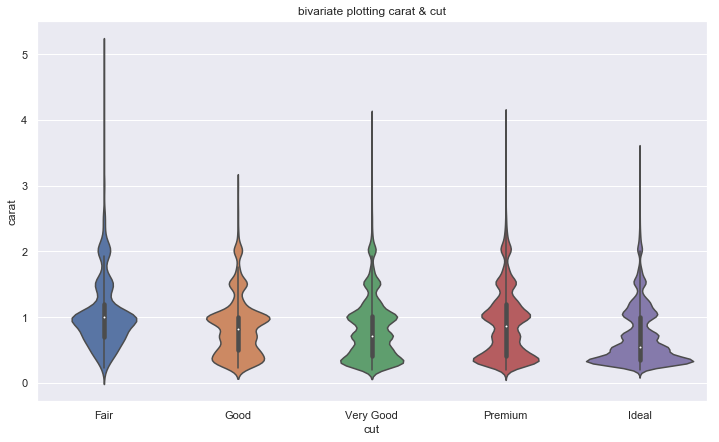

In [23]:
# bivariate plots of carat vs. cut, color, clarity
plt.subplots(figsize=(12,7))
sns.violinplot(data=diamonds,x='cut',y='carat')
plt.title('bivariate plotting carat & cut');

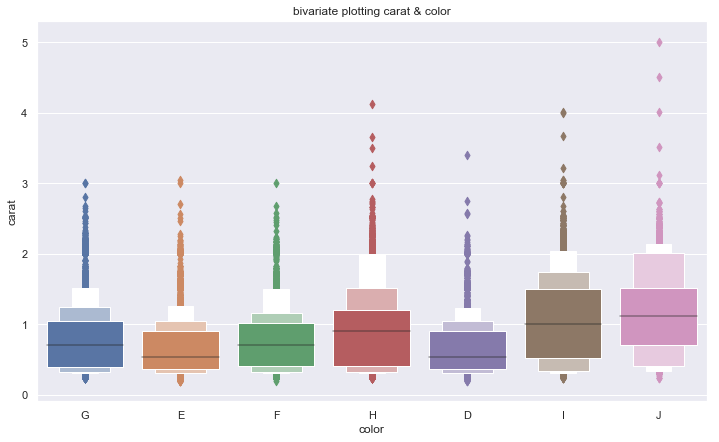

In [24]:
# bivariate plots of carat vs. cut, color, clarity
plt.subplots(figsize=(12,7))
sns.boxenplot(data=diamonds,x='color',y='carat',order=diamonds['color'].value_counts().index,scale='linear'
             ,outlier_prop=0.5);
plt.title('bivariate plotting carat & color');

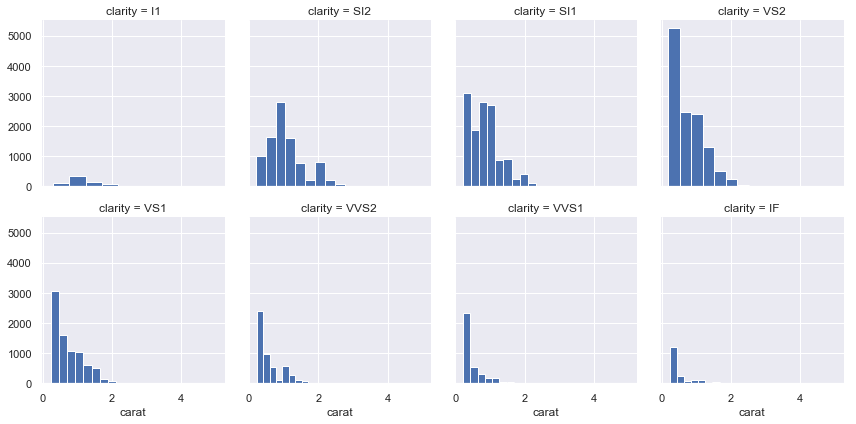

In [25]:
g=sns.FacetGrid(data=diamonds,col='clarity', col_wrap=4)
g.map(plt.hist,'carat');

Carat vs. Categorical comment: These plots should shed a lot more light into the patterns already seen. Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price.

## Multivariate Exploration

To start off with, create a plot of the relationship between price, carat, and clarity. In the previous workspace, you saw that clarity had the clearest interactions with price and carat. How clearly does this show up in a multivariate visualization?

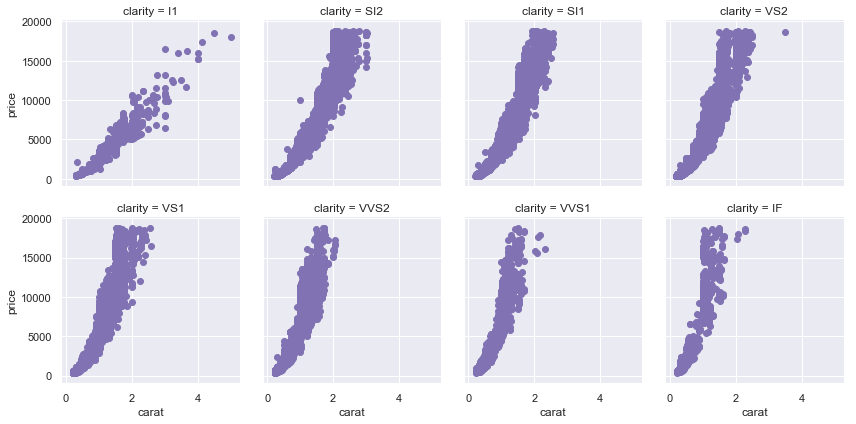

In [26]:
# multivariate plot of price by carat weight, and clarity
#Facetgrid
g = sns.FacetGrid(data=diamonds,col='clarity',col_wrap=4)
g.map(plt.scatter,'carat','price',color='m');

**With two numeric variables and one categorical variable,** there are two main plot types that make sense. A scatterplot with points colored by clarity level makes sense on paper, but the sheer number of points causes overplotting that suggests a different plot type. A faceted scatterplot or heat map is a better choice in this case

To avoid the trap of higher quality grades being associated with smaller diamonds, and thus lower prices, we should focus our visualization on only a small range of diamond weights. For this plot, select diamonds in a small range around 1 carat weight. Try to make it so that your plot shows the effect of each of these categorical variables on the price of diamonds.

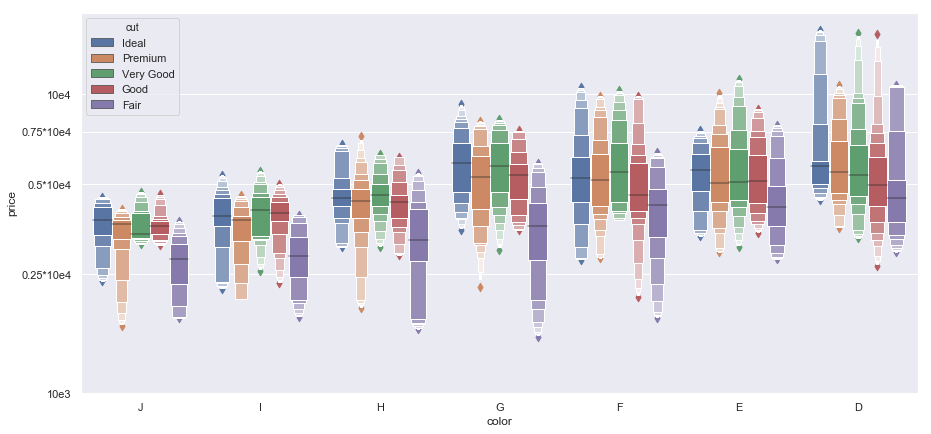

In [27]:
# multivariate plot of price by cut and color, for approx. 1 carat diamonds
small=diamonds.query('carat>=0.95 & carat<=1.00 ')  # around 1 carat diamonds 
plt.subplots(figsize=(15,7))
sns.boxenplot(data=small,x='color',y='price',hue='cut',scale='linear',hue_order=diamonds.cut.value_counts().index)
plt.yscale('log')
plt.yticks([10**3,0.25*10**4,0.5*10**4,0.75*10**4,10**4], ['10e3','0.25*10e4','0.5*10e4','0.75*10e4','10e4'])
ax.set_yticklabels([], minor = True);

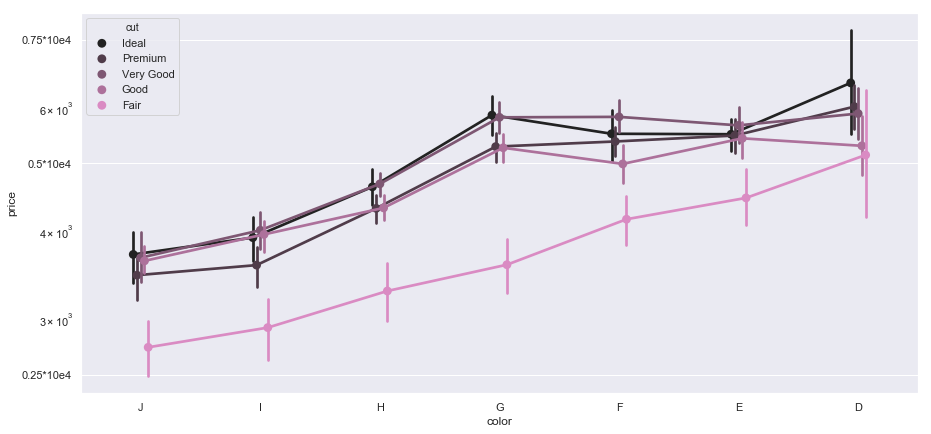

In [28]:
plt.subplots(figsize=(15,7))
base_color = sns.color_palette()[6]
sns.pointplot(data=small,x='color',y='price',hue='cut',dodge=True,
              color=base_color,hue_order=diamonds.cut.value_counts().index)
# dodge: amount to separate the points for each level of the hue variable along the categorical axis.
plt.yscale('log')
plt.yticks([0.25*10**4,0.5*10**4,0.75*10**4], ['0.25*10e4','0.5*10e4','0.75*10e4'])
ax.set_yticklabels([], minor = True);

There's a lot of ways that you could plot one numeric variable against two categorical variables. I think that the clustered box plot or the clustered point plot are the best choices in this case. With the number of category combinations to be plotted